### Автор: Влада Керножицкая

In [40]:
import pandas

### dataset

In [41]:
dataset = pandas.read_csv('ru_subject_domain_classification.corpus', 
                          sep='\t', header=None)
dataset.head(5)

,0,1
0,МАТЕМАТИКА,Алгоритм размещения элементов СБИС.
1,БИОЛОГИЯ,Восстановительное природопользование основа ус...
2,БИОЛОГИЯ,Культура зародышей Paeonia anomala L.
3,ГЕОЛОГИЯ,Экологический мониторинг загазованных донных о...
4,БИОЛОГИЯ,Ультразвуковые методы определения газонасыщени...


### Вывести на экран первые 5 записей

In [42]:
dataset.head(5)

,0,1
0,МАТЕМАТИКА,Алгоритм размещения элементов СБИС.
1,БИОЛОГИЯ,Восстановительное природопользование основа ус...
2,БИОЛОГИЯ,Культура зародышей Paeonia anomala L.
3,ГЕОЛОГИЯ,Экологический мониторинг загазованных донных о...
4,БИОЛОГИЯ,Ультразвуковые методы определения газонасыщени...


### Переименовать столбцы 0 : 'label', 1 : 'x' соответственно

In [43]:
dataset.rename({0:'label', 1:'x'}, axis=1, inplace=True)

### Отобразить распределение лэйблов с помощью метода value_counts:

In [44]:
print(dataset.label.value_counts())

БИОЛОГИЯ      1031
ГЕОЛОГИЯ       977
МАТЕМАТИКА     670
Name: label, dtype: int64


### Визуализируем

AxesSubplot(0.125,0.125;0.775x0.755)


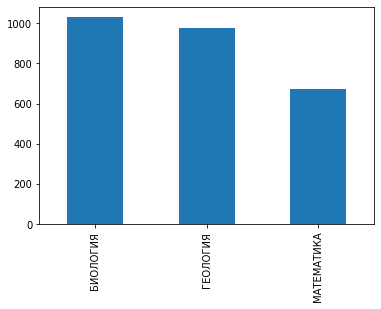

In [45]:
print(dataset.label.value_counts().plot.bar());

### Еще раз вывели на экран первые 5 записей

In [46]:
dataset.head(5)

,label,x
0,МАТЕМАТИКА,Алгоритм размещения элементов СБИС.
1,БИОЛОГИЯ,Восстановительное природопользование основа ус...
2,БИОЛОГИЯ,Культура зародышей Paeonia anomala L.
3,ГЕОЛОГИЯ,Экологический мониторинг загазованных донных о...
4,БИОЛОГИЯ,Ультразвуковые методы определения газонасыщени...


### Создали функцию для предобработки данных

In [47]:
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import re
stemmer = SnowballStemmer("russian")

def preprocess_twit(sent):
    #remove URLS
    sent = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', sent)
    sent = re.sub('@[^\s]+','', sent) #remove Users
    #smiles processing
    sent = re.sub('[:;^8=]{1}-?[)PD8o]+', 'positive_smile', sent)
    sent = re.sub('[:;^8=]{1}-?[(/|]+', 'negative_smile', sent)
    sent = sent.strip() # удаление пробелов по бокам
    sent = sent.lower() # lower-case
    sent = re.sub('[0-9]+', '', sent) # удаление цифр
     # удаление одноcимвольных токенов
    sent = re.sub(r'\b\w\b', '', sent)
    #удаление пунктуации
    sent = re.sub('[^A-Za-zА-Яа-я_\s]+', '', sent)
    # удаление стоп-слов
    sent = [x for x in sent.split() 
            if x not in stopwords.words('russian')]
    sent = [stemmer.stem(x) for x in sent] # cтемминг
    sent = ' '.join(sent) # cоединяем элементы списка
    return sent

### Вывести на экран результат применения функции к предложению sent='Восстановительное природопользование основа устойчивого развития.'

In [48]:
sent = 'Восстановительное природопользование основа устойчивого развития.'
print(preprocess_twit(sent))

восстановительн природопользован основ устойчив развит


### Применить функцию preprocess_data с помощью метода apply к столбцу X

In [49]:
dataset['x'] = dataset['x'].apply(preprocess_twit)

### Повторить вывод пяти первых строк

In [50]:
dataset.head(5)

,label,x
0,МАТЕМАТИКА,алгоритм размещен элемент сбис
1,БИОЛОГИЯ,восстановительн природопользован основ устойчи...
2,БИОЛОГИЯ,культур зародыш paeonia anomala
3,ГЕОЛОГИЯ,экологическ мониторинг загазова дон осадк
4,БИОЛОГИЯ,ультразвуков метод определен газонасыщен биоло...


### Отделить лейблы от фич и разбить наш dataset на train и test

In [51]:
from sklearn.model_selection import train_test_split
# отделяем лейблы от фич
X = dataset.x
y = dataset.label
# разбиваем наш датасет на train и test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

### Векторизацию выполнить тремя типами векторов

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

#One hot encoding (Binary)
vectorizer_binary = CountVectorizer(binary=True)

vectorizer_binary.fit(X)
X_binary_train = vectorizer_binary.transform(X_train)
X_binary_test = vectorizer_binary.transform(X_test) 

#Frequency Encoding
vectorizer_freq = CountVectorizer() 

vectorizer_freq.fit(X) 
X_freq_train = vectorizer_freq.transform(X_train)
X_freq_test = vectorizer_freq.transform(X_test)

#Term Frequency - Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer() 

vectorizer_tfidf.fit(X) 
X_tfidf_train = vectorizer_tfidf.transform(X_train) 
X_tfidf_test = vectorizer_tfidf.transform(X_test) 

### Вывести на экран, какой размерности наши вектора, допустим, бинарный :

In [53]:
print("Матрица train выборки:", X_binary_train.get_shape())

Матрица train выборки: (1874, 12712)


### Используя метод LogisticRegression, обучить сначала на binary векторах, предсказать вероятные варианты на data_test и определить, насколько хорошо обучилась модель

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model_binary = LogisticRegression(solver = 'lbfgs', 
                                      multi_class='auto')
log_model_binary.fit(X_binary_train, y_train)
predictions = log_model_binary.predict(X_binary_test)
print("Logstic Regression with Binary accuracy score:", 
      accuracy_score(y_test, predictions))

Logstic Regression with Binary accuracy score: 0.9203980099502488


### Используя метод LogisticRegression, обучить на Frequency векторах, предсказать вероятные варианты на data_test и определить, насколько хорошо обучилась модель

In [55]:
log_model_freq = LogisticRegression(solver = 'lbfgs', 
                                    multi_class='auto')
log_model_freq.fit(X_freq_train, y_train)
predictions_freq = log_model_freq.predict(X_freq_test)
print("Logstic Regression with Frequency accuracy score:", 
      accuracy_score(y_test, predictions_freq))

Logstic Regression with Frequency accuracy score: 0.9191542288557214


### Используя метод LogisticRegression, обучить на TfIdf векторах, предсказать вероятные варианты на data_test и определить, насколько хорошо обучилась модель

In [56]:
log_model_tfidf = LogisticRegression(solver = 'lbfgs', 
                                     multi_class='auto')
log_model_tfidf.fit(X_tfidf_train, y_train)
predictions_tfidf = log_model_tfidf.predict(X_tfidf_test)
print("Logstic Regression with TfIdf accuracy score:", 
      accuracy_score(y_test, predictions_tfidf))

Logstic Regression with TfIdf accuracy score: 0.9291044776119403


##### Исходя из полученных мною данных о работе обученных моделей, с применением разных методов векторизации, а именно:
        Binary: "log_model_binary" accuracy score: 0.9203980099502488
        Frequency: "log_model_freq" accuracy score: 0.9191542288557214
        Tf-Idf: "log_model_tfidf" accuracy score: 0.9291044776119403
#### Лучше всего сработала модель "log_model_tfidf"(0.929).
#### Хуже всего сработала модель "log_model_freq"(0.919).

### Тестирование модели

In [65]:
#test text fragment
#string = "Биология - наука о жизни, о живых организмах. Она изучает различные формы жизни, их строение и разнообразие, а также законы природы."
string = input("Забросьте фрагмент текста: ") 
print("Введенный текст: " + string)

Забросьте фрагмент текста: Биология - наука о жизни, о живых организмах. Она изучает различные формы жизни, их строение и разнообразие, а также законы природы.
Введенный текст: Биология - наука о жизни, о живых организмах. Она изучает различные формы жизни, их строение и разнообразие, а также законы природы.


In [66]:
print(f"Текст '{string}' относится к теме {log_model_tfidf.predict(vectorizer_tfidf.transform([string]))[0]}!")

Текст 'Биология - наука о жизни, о живых организмах. Она изучает различные формы жизни, их строение и разнообразие, а также законы природы.' относится к теме БИОЛОГИЯ!
